# **Cartpole**

In [2]:
from stable_baselines3 import PPO, DQN, A2C
import gymnasium as gym
from stable_baselines3.common.logger import configure
from stable_baselines3.common.evaluation import evaluate_policy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tmp_path = "./results/"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = A2C(policy = "MlpPolicy", env = env, device="cpu")

model.set_logger(new_logger)
model.learn(total_timesteps=1_000_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 15.7     |
|    ep_rew_mean        | 15.7     |
| time/                 |          |
|    fps                | 2852     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0.0382   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.84     |
|    value_loss         | 8.49     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.8     |
|    ep_rew_mean        | 18.8     |
| time/                 |          |
|    fps                | 3028     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/        

In [5]:
env = gym.make("CartPole-v1", render_mode='human')
(obs,_) = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

2025-03-26 15:24:07.973 Python[19843:925397] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-26 15:24:07.973 Python[19843:925397] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [4]:
model.save("./model/A2C_CartPole")

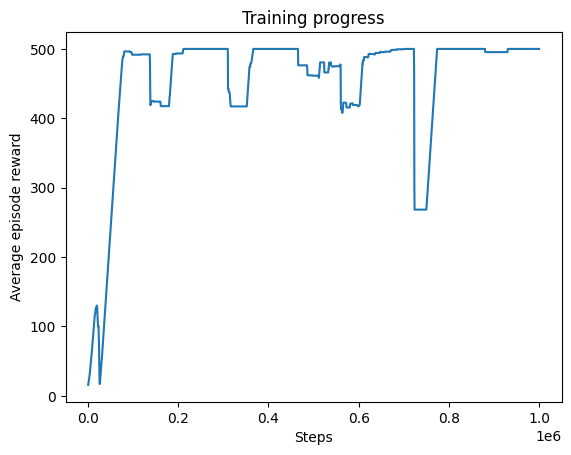

In [5]:
df = pd.read_csv("results/progress.csv")

df.head()

plt.plot(df['time/total_timesteps'], df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('Training progress')
plt.show()